<a href="https://colab.research.google.com/github/BLOOSALMON/My_Real_Projrct/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B42%EB%82%A0%EC%94%A8%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 임의의 랜덤 분포에서 데이터 가져오는 함수 data_iter
24 시간 뒤 날씨 예측

def data_iter(batch_size, X, y, L): # batch_size = 전제 epoch 학습을 위한 분리, x - 학습데이터, y,- target, L =
    num_examples = len(X):
    indices = list(range(num_examples))
    random.shuffle(indices)

    for in


In [ ]:
# 캐라스로 RNN 구현하기 - 층 추가

from tensorflow.keras.layers import SimpleRNN

model.add(SimpleRNN(hidden_units))

modela.add(hidden_units, input_shape = (timesteps, input_dim)) # 입력 시뭔스의 길이이자 시점의 수, 입력의 크기

NameError: name 'model' is not defined

In [ ]:
# 모델이 내부적으로 출력 결과 어떻게 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2, 10)))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 3)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

프로젝트 선정 시, 날짜 최신인지 확인하기


안보고 그 기능 구현할 줄 알아야 함. 그리고 다른 데이터 셋에 혼자 적용 가능해야 함.

LNN

In [ ]:
import keras
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("stytch16/jena-climate-2009-2016")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/jena-climate-2009-2016


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/kaggle/input/jena-climate-2009-2016/jena_climate_2009_2016.csv


In [ ]:
data = pd.read_csv("/kaggle/input/jena-climate-2009-2016/jena_climate_2009_2016.csv")
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
t

In [ ]:
data.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [ ]:
# 날짜 데이터를 열로 변환하는 과정.
data["Date Time"] = pd.to_datetime(data["Date Time"], dayfirst=True)
data.set_index("Date Time", inplace=True)
temp = data[["T (degC)"]] # [] = series, [[]] = dataframe


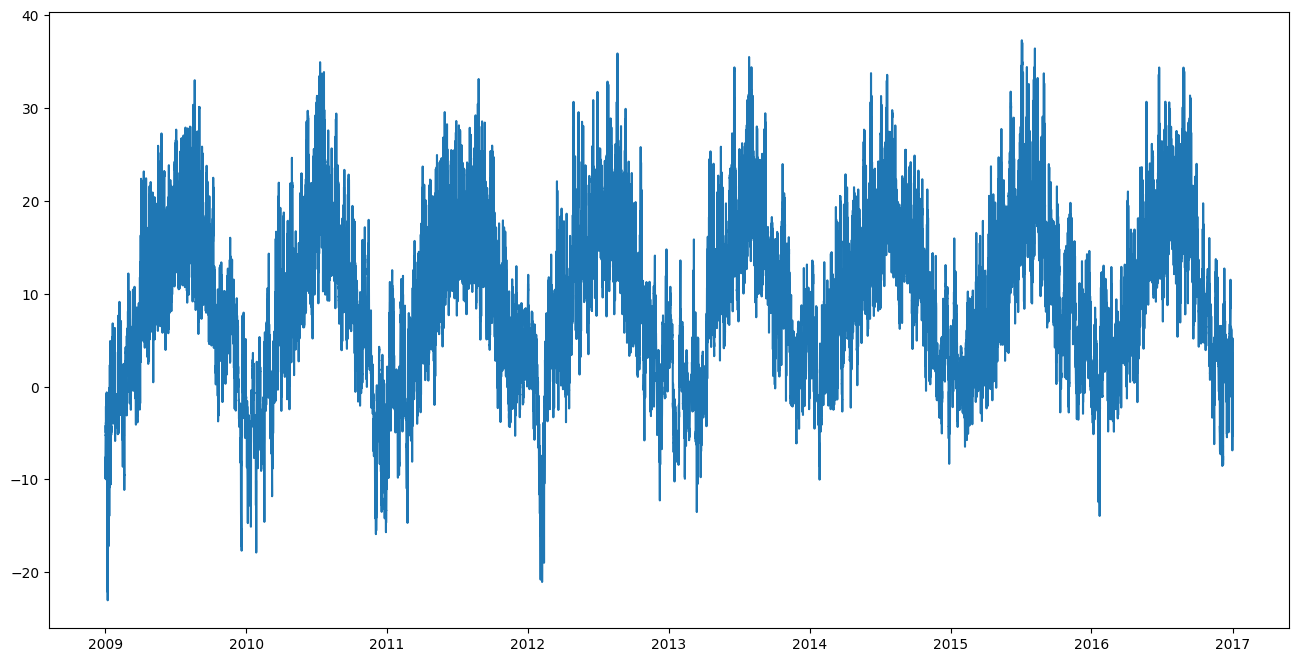

In [ ]:
#
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(temp, label="temperatue history")


In [ ]:
data = data.sort_index(ascending=True, axis=0)

data['index_col'] = data.index

new_dataset = data[['index_col', "T (degC)"]].sort_index(ascending=True)

In [ ]:
new_dataset = new_dataset.drop(columns  = ['index_col'])

In [ ]:
new_dataset


,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-01 00:20:00,-8.41
2009-01-01 00:30:00,-8.51
2009-01-01 00:40:00,-8.31
2009-01-01 00:50:00,-8.27
...,...
2016-12-31 23:20:00,-4.05
2016-12-31 23:30:00,-3.35
2016-12-31 23:40:00,-3.16


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(new_dataset['T (degC)'], model = 'additive', period  = 365)
result.plot()

NameError: name 'new_dataset' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_data = new_dataset[0:350000]
valid_data = new_dataset[350001:]

scaled_train_data = scaler.fit_transform(train_data)
scaled_valid_data = scaler.fit_transform(valid_data)

x_train_data,y_train_data = [], []

for i in range(60, len(train_data)):
  x_train_data.append(scaled_train_data[i-60:i,0])
  y_train_data.append(scaled_train_data[i,0])

x_train_data,y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

In [ ]:
# lstm 파라미터 : 샘플, 타임스텝, 특징
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data.shape[1], 1))) # input_shape : batch_size 자동지정
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


# | 항목                 | 의미                      |
# | ------------------ | ----------------------- |
# | `-len(valid_data)` | 예측 구간만큼 앞당김             |
# | `-60`              | LSTM 입력용으로 이전 60개 시점 확보 |
# | `.values`          | DataFrame → 넘파이 배열로 변환  |

inputs_data = new_dataset[len(new_dataset)-len(valid_data)-60: ].values
inputs_data = inputs_data.reshape(-1, 1) #스케일링 시 2차원
inputs_data = scaler.transform(inputs_data)

lstm_model.compile(loss="mean_squared_error",optimizer = "adam" ) # 손실함수 최소화하도록 가중치 업데이트
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=64
               , verbose=1) # batch_size 가중치 업데이트 횟수

x_test = []
for i in range(60, inputs_data.shape[0]):
  x_test.append(inputs_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_closing_price =lstm_model.predict(x_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

# | 단계                 | 차원           | 설명                                      |
# | ------------------ | ------------ | --------------------------------------- |
# | `inputs_data`      | (160, 1)     | 전체 시계열 데이터                              |
# | `x_test` 초기        | 리스트          | 각 원소가 길이 60인 배열                         |
# | `np.array(x_test)` | (100, 60)    | 60개씩 잘라낸 시퀀스 100개                       |
# | LSTM reshape 후     | (100, 60, 1) | LSTM 입력: (samples, timesteps, features) |





/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5468/5468 ━━━━━━━━━━━━━━━━━━━━ 451s 69ms/step - loss: 0.0023
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step


<ipython-input-26-54fb9f10bca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data["Predictions"] = predicted_closing_price


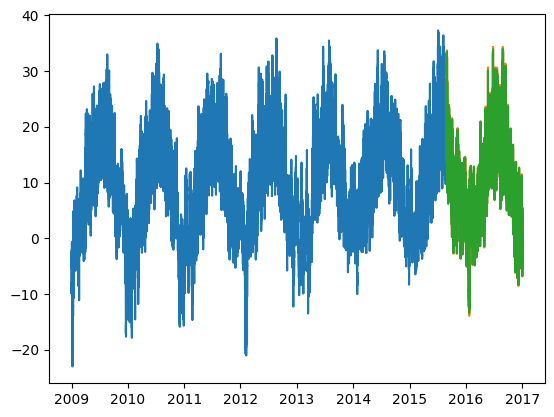

In [ ]:
valid_data["Predictions"] = predicted_closing_price

import matplotlib.pyplot as plt

plt.plot(train_data["T (degC)"])
plt.plot(valid_data[["T (degC)", "Predictions"]])

In [ ]:
입력: (batch_size, 30, 1)
   ↓
LSTM(50, return_sequences=True)
   → 출력: (batch_size, 30, 50)
   ↓
LSTM(50)  ← 마지막 시점만
   → 출력: (batch_size, 50)
   ↓
Dense(1)
   → 출력: (batch_size, 1)

구조는 다음과 같은 시계열 예측 문제에 자주 사용됩니다:

주가, 기온 등 미래 1개 값을 예측하는 회귀 문제

입력은 과거 일정 기간의 데이터 (예: 30일), 출력은 다음 1일의 값

